# Lesson Bayes: Priors
Expressing plausibility before seeing data

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

# A/B Testing: What do we know before we see the data?
Before running the experiment what do we believe the conversion ratio could be?

* Any value between 0% and 100% equally?
* Probably 20% based on past experience?
* Definitely not above 40%?

# Priors distributions can let us express our expert knowledge
Each of these distributions showcase a different belief

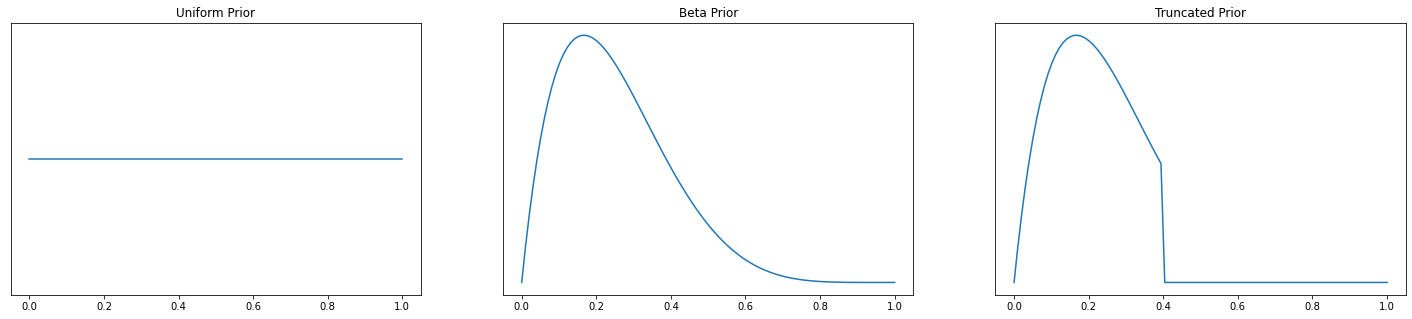

In [2]:
def priors(labels):
    fig, axes = plt.subplots(1, 3, figsize=(25,5))

    x = np.linspace(0,1,100)

    unif = stats.uniform(0,1)
    axes[0].plot(x, unif.pdf(x))
    axes[0].set_title(labels[0])

    beta = stats.beta(2,6)
    axes[1].plot(x, beta.pdf(x))
    axes[1].set_title(labels[1])


    truncated = stats.beta(4,12)
    pdf = beta.pdf(x)
    pdf[x>.4] = 0
    axes[2].plot(x, pdf)
    axes[2].set_title(labels[2])

    for ax in axes:
        ax.set_yticks([])
    return 

labels = ["Uniform Prior", "Beta Prior", "Truncated Prior"]
priors(labels)

# Aren't priors subjective?
Sometimes. Keep in mind all statistics is subjective whether that be
* What p value to use in a freqentist framework
* What outliers to remove
* What methodology to use

# Informative vs Uninformative Prior
You choose the what of plausibility that is conveyed in a prior. 

Some priors convey very differing plausibility, such as the Uniform distribution

In the charts below the other two informative priors contain some information whether that be
* Relative degree of belief
* The range of possibilities

In all cases we are expressing the plausibility of every value *prior* to seeing any data

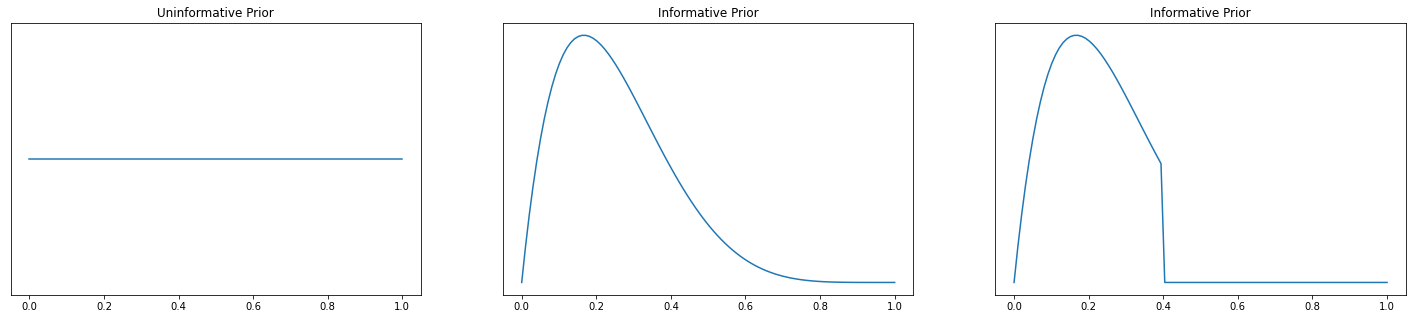

In [3]:
labels = ["Uninformative Prior", "Informative Prior", "Informative Prior"]
priors(labels)

# 🔑  The rationale behind the prior is what's important

You may be now thinking "Well how do I know the right/best/correct prior?" The truth is you won't.

There's a famous quote stating "All models are wrong, some are useful"

When selecting priors the task is not to pick the right prior *independent of any other factor*, but one that you can justify in context with
* the rest of the model
* how your model will be used in reality
* the experience of domain experts

# Priors are a form of regularization
Another benefit of priors is they can be utilized to focus the models on reasonable possibilities and not far flung parameters that happen optimize a metric.

In other words we can use priors to
* Highlight reasonable possible parameters
* Penalize unreasonable possible parameters

For example in the case below if we were using a Bayesian model to estimate the degree of fit of a polynomial, we could choose to put a prior with high beliefs on polynomial degree 2-6, but lesser belief on 0, 1 and greater than 8

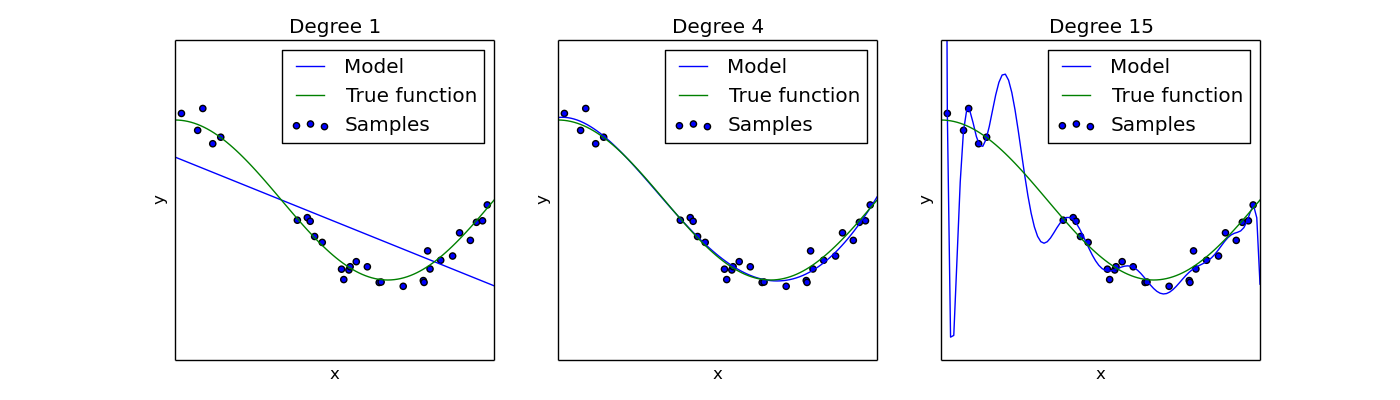
**Source**: scikit-learn documentation

# Section Recap
* Priors distributions express the plausibility of parameters prior to seeing data
* Priors *can*, but do not necessarily, have to be subjective
* When choosing a prior focus on the rationale behind the prior, not picking the "right" prior
